In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv("Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


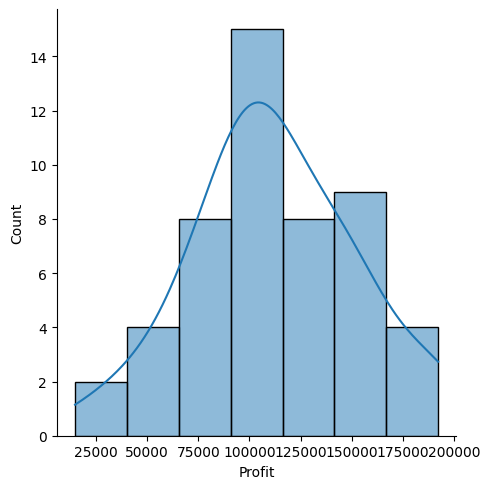

In [7]:
sns.displot(df['Profit'],kde=True)
plt.show()

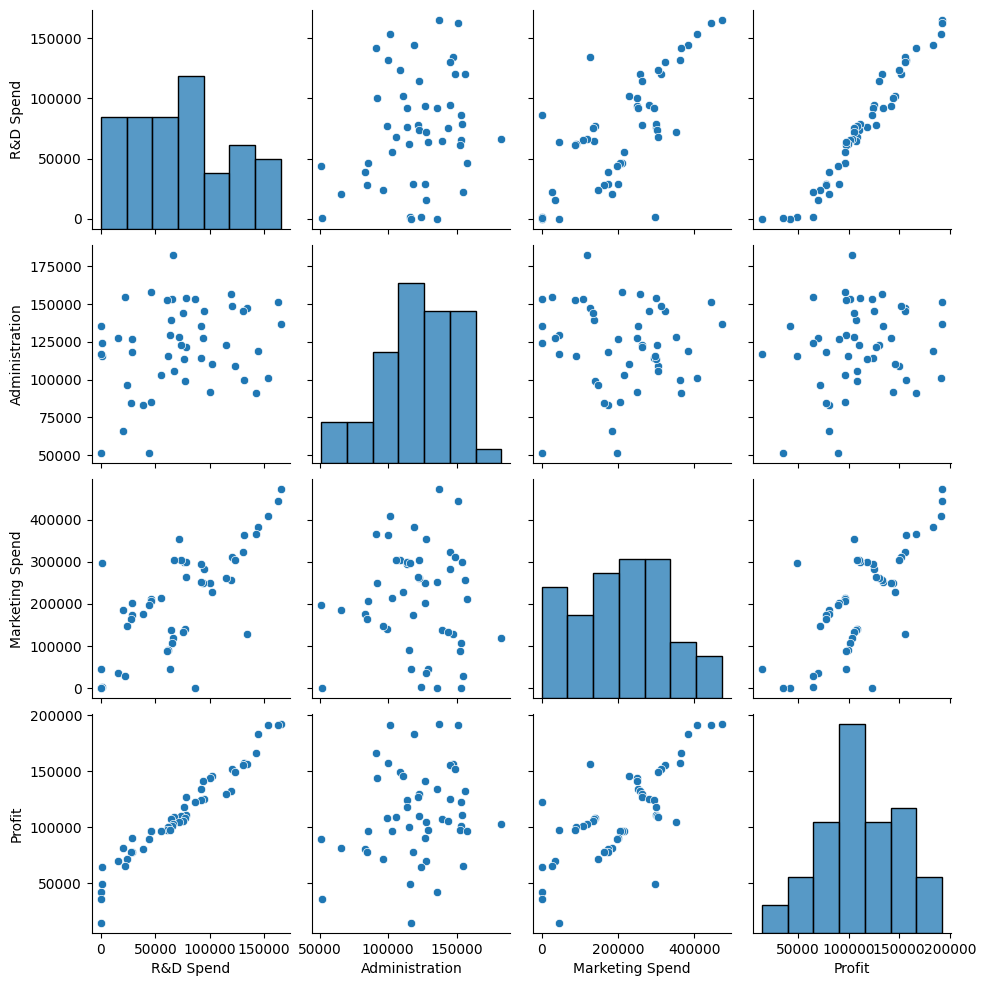

In [8]:
sns.pairplot(df)

In [13]:
x= df.iloc[:,:-2]
y= df.iloc[:,-1]


In [14]:
x.head(),y.head()

(   R&D Spend  Administration  Marketing Spend
 0  165349.20       136897.80        471784.10
 1  162597.70       151377.59        443898.53
 2  153441.51       101145.55        407934.54
 3  144372.41       118671.85        383199.62
 4  142107.34        91391.77        366168.42,
 0    192261.83
 1    191792.06
 2    191050.39
 3    182901.99
 4    166187.94
 Name: Profit, dtype: float64)

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
len(xtrain),len(ytrain),len(xtest),len(ytest)

(37, 37, 13, 13)

In [17]:
knr = KNeighborsRegressor()

In [18]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [19]:
ypred = knr.predict(xtest)
ypred

array([114604.224, 131413.948, 133081.098,  82280.298, 175939.92 ,
       123955.812,  82280.298,  94194.948, 117631.662, 159523.488,
        87323.16 ,  82280.298, 114604.224])

In [20]:
xpred = knr.predict(xtrain)
xpred

array([108310.754, 125321.05 , 141472.32 , 132756.586,  51425.304,
        45519.92 , 102865.29 , 132756.586, 102865.29 ,  91020.32 ,
       130504.614,  89340.108, 120767.644,  51425.304, 138881.544,
       131634.642,  99027.704, 159523.488, 124450.114,  85771.338,
        51425.304, 175939.92 , 131634.642,  82280.298,  93679.644,
       114604.224, 117956.174,  83633.03 , 126327.218,  79544.748,
       142381.654,  82280.298, 103000.944, 167929.908, 175939.92 ,
        51425.304,  51425.304])

In [21]:
train = r2_score(ytrain,xpred)
test = r2_score(ytest,ypred)

In [22]:
train, test

(0.8267696312503181, 0.8894979041083383)

In [23]:
# find the best k value for better accuracy

In [24]:
trainac=[]
testac=[]
for i in range(1,31):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(xtrain,ytrain)
    train = knr.score(xtrain,ytrain)
    test = knr.score(xtest,ytest)
    trainac.append(train)
    testac.append(test)

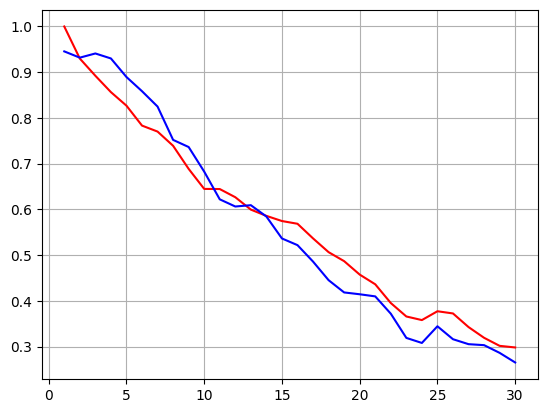

In [25]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="blue")
plt.grid()
plt.show()

In [26]:
knn = KNeighborsRegressor(n_neighbors=2)

In [27]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=2)

In [28]:
ypred = knn.predict(xtest)
ypred

array([104204.49 , 135751.28 , 137946.435,  76252.125, 169946.555,
       113604.01 ,  85477.45 , 100471.115, 113604.01 , 169946.555,
        85856.975,  85477.45 , 104204.49 ])

In [29]:
xpred = knn.predict(xtrain)
xpred

array([ 93710.495, 121370.465, 153982.185, 131259.845,  53742.905,
        50299.745, 104204.49 , 135751.28 , 100471.115,  98682.715,
       134289.225,  76252.125, 113604.01 ,  42220.19 , 153982.185,
       137946.435, 104204.49 , 169946.555, 118341.695,  84474.05 ,
        42220.19 , 192026.945, 137946.435,  85477.45 , 107978.19 ,
       131763.425, 113604.01 ,  84474.05 , 118341.695, 110102.35 ,
       137013.43 ,  76252.125,  79112.37 , 169946.555, 192026.945,
        53742.905,  67479.655])

In [30]:
train = r2_score(ytrain,xpred)
test = r2_score(ytest,ypred)

In [31]:
train,test

(0.9298851665409241, 0.9318272213333811)